<h1 style= "text-align: center"><b>CNN LENET-5 MODEL</b></h1>

- Full name: Võ Nguyễn Hoàng Kim
- Student ID: 21127090

# <b> MNIST DATASET </b>

## 1. Import libraries

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt

## 2. Load dataset ##


In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2.1 Normalize dataset ###

In [4]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 3. Build Model ##

In [5]:
# Building the Model Architecture
model = Sequential()

# Convolution layer
model.add(Conv2D(filters = 6, kernel_size = (5, 5), padding = "same", activation='tanh', input_shape = (28, 28, 1)))

# Subsampling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2)))

# Convolution layer
model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation='tanh'))

# Subsampling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2)))

 # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(Flatten())

# Fully connected layer
model.add(Dense(120, activation='tanh'))

model.add(Dense(84, activation='tanh'))

model.add(Dense(10, activation='softmax'))




### 3.1 Build and Summary model

In [6]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### 3.2 Compile model ###

In [7]:
# compile model
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

### 3.3 Train model ###

In [8]:
model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 11s 21ms/step - loss: 0.3229 - accuracy: 0.9063 - val_loss: 0.1333 - val_accuracy: 0.9587
Epoch 2/100
469/469 [==============================] - 10s 21ms/step - loss: 0.1124 - accuracy: 0.9662 - val_loss: 0.0869 - val_accuracy: 0.9713
Epoch 3/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0649 - val_accuracy: 0.9796
Epoch 4/100
469/469 [==============================] - 10s 20ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0612 - val_accuracy: 0.9800
Epoch 6/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0585 - val_accuracy: 0.9813
Epoch 7/100
469/469 [==============================] - 10s 22ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0468 - val_ac

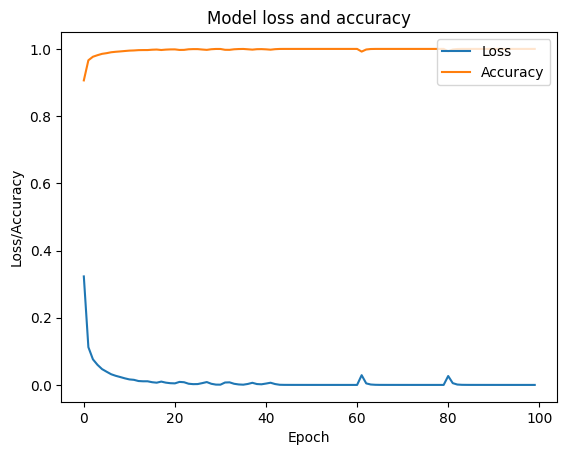

In [9]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])

plt.title('Model loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

In [ ]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['val_accuracy'])

plt.title('Model for loss and accuracy')
plt.ylabel('Val_Loss/Val_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Val_Loss', 'Val_Accuracy'], loc='upper right')
plt.show()

### 3.4 Predict ###

In [11]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

model.save_weights('MNIST_weights.h5')

313/313 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9883
Test Loss: 0.06676889210939407
Test accuracy: 0.9883000254631042


# <b> FASHION MNIST </b>

## 1. Load dataset ##

In [12]:
# Loading the dataset and perform splitting
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 1.1 Normalize dataset ###

In [13]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 2. Build model ##

In [14]:
# Building the Model Architecture
model_fashion_mnist = Sequential()

# Convolution layer
model_fashion_mnist.add(Conv2D(filters = 6, kernel_size = (5, 5), padding = "same", activation='tanh', input_shape = (28, 28, 1)))

# Subsampling layer
model_fashion_mnist.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2)))

# Convolution layer
model_fashion_mnist.add(Conv2D(filters = 16, kernel_size = (5, 5), activation='tanh'))

# Subsampling layer
model_fashion_mnist.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2)))

 # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model_fashion_mnist.add(Flatten())

# Fully connected layer
model_fashion_mnist.add(Dense(120, activation='tanh'))

model_fashion_mnist.add(Dense(84, activation='tanh'))

model_fashion_mnist.add(Dense(10, activation='softmax'))

In [15]:
model_fashion_mnist.build()
model_fashion_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [16]:
model_fashion_mnist.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model_fashion_mnist.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))


Epoch 1/100
469/469 [==============================] - 11s 21ms/step - loss: 0.6123 - accuracy: 0.7775 - val_loss: 0.4803 - val_accuracy: 0.8272
Epoch 2/100
469/469 [==============================] - 10s 22ms/step - loss: 0.4139 - accuracy: 0.8496 - val_loss: 0.4107 - val_accuracy: 0.8511
Epoch 3/100
469/469 [==============================] - 13s 27ms/step - loss: 0.3658 - accuracy: 0.8669 - val_loss: 0.3903 - val_accuracy: 0.8589
Epoch 4/100
469/469 [==============================] - 16s 34ms/step - loss: 0.3364 - accuracy: 0.8775 - val_loss: 0.3585 - val_accuracy: 0.8703
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.3178 - accuracy: 0.8828 - val_loss: 0.3478 - val_accuracy: 0.8731
Epoch 6/100
469/469 [==============================] - 10s 21ms/step - loss: 0.3000 - accuracy: 0.8904 - val_loss: 0.3283 - val_accuracy: 0.8809
Epoch 7/100
469/469 [==============================] - 10s 21ms/step - loss: 0.2870 - accuracy: 0.8941 - val_loss: 0.3249 - val_ac

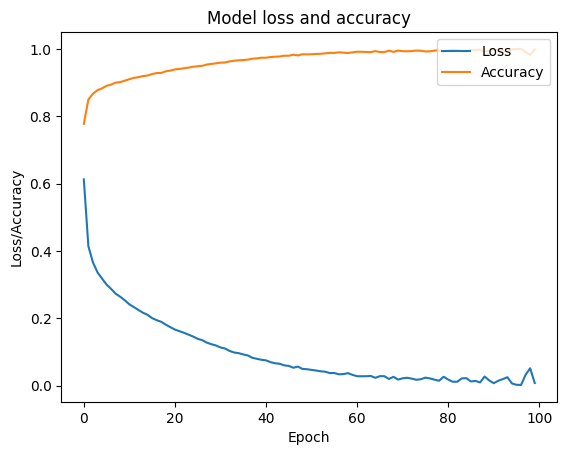

In [17]:
plt.plot(model_fashion_mnist.history.history['loss'])
plt.plot(model_fashion_mnist.history.history['accuracy'])

plt.title('Model loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

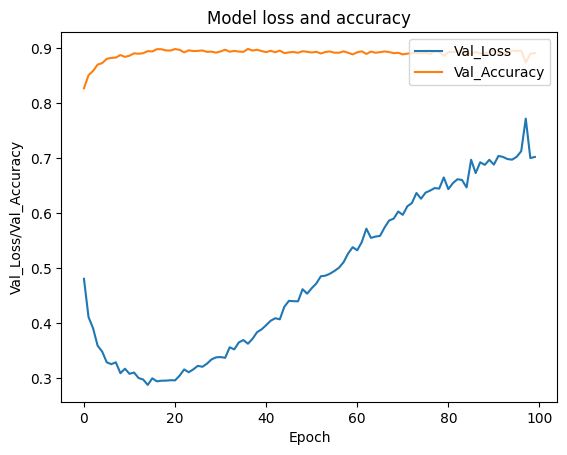

In [18]:
plt.plot(model_fashion_mnist.history.history['val_loss'])
plt.plot(model_fashion_mnist.history.history['val_accuracy'])

plt.title('Model loss and accuracy')
plt.ylabel('Val_Loss/Val_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Val_Loss', 'Val_Accuracy'], loc='upper right')
plt.show()

In [19]:
score = model_fashion_mnist.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.7022 - accuracy: 0.8912
Test Loss: 0.7022039890289307
Test accuracy: 0.8912000060081482


# <b> MNIST Fashion with MNIST weights </b>

In [20]:
model_fashion_mnist.load_weights("MNIST_weights.h5")

model_fashion_mnist.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model_fashion_mnist.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))


Epoch 1/100
469/469 [==============================] - 16s 32ms/step - loss: 1.1131 - accuracy: 0.7210 - val_loss: 0.5631 - val_accuracy: 0.8019
Epoch 2/100
469/469 [==============================] - 15s 33ms/step - loss: 0.4923 - accuracy: 0.8220 - val_loss: 0.4654 - val_accuracy: 0.8307
Epoch 3/100
469/469 [==============================] - 18s 39ms/step - loss: 0.4270 - accuracy: 0.8460 - val_loss: 0.4310 - val_accuracy: 0.8402
Epoch 4/100
469/469 [==============================] - 16s 34ms/step - loss: 0.3911 - accuracy: 0.8580 - val_loss: 0.4199 - val_accuracy: 0.8463
Epoch 5/100
469/469 [==============================] - 13s 27ms/step - loss: 0.3644 - accuracy: 0.8660 - val_loss: 0.3895 - val_accuracy: 0.8582
Epoch 6/100
469/469 [==============================] - 10s 21ms/step - loss: 0.3456 - accuracy: 0.8737 - val_loss: 0.3817 - val_accuracy: 0.8615
Epoch 7/100
469/469 [==============================] - 10s 20ms/step - loss: 0.3311 - accuracy: 0.8788 - val_loss: 0.3633 - val_ac

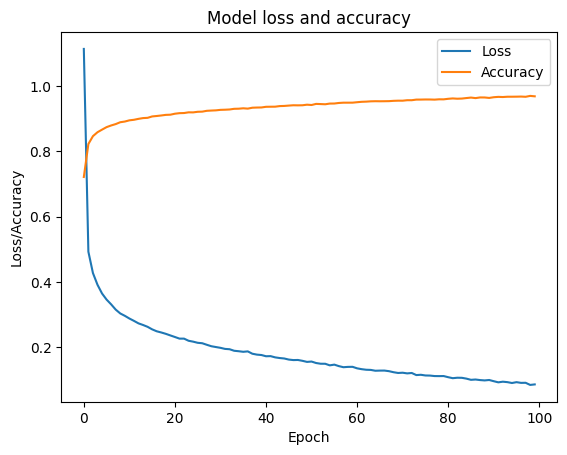

In [21]:
plt.plot(model_fashion_mnist.history.history['loss'])
plt.plot(model_fashion_mnist.history.history['accuracy'])

plt.title('Model loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

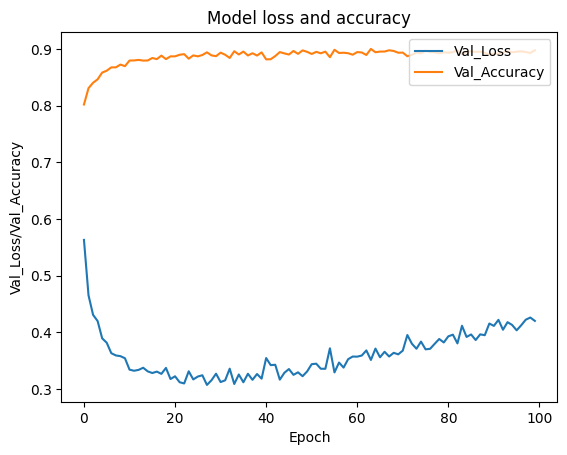

In [22]:
plt.plot(model_fashion_mnist.history.history['val_loss'])
plt.plot(model_fashion_mnist.history.history['val_accuracy'])

plt.title('Model loss and accuracy')
plt.ylabel('Val_Loss/Val_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Val_Loss', 'Val_Accuracy'], loc='upper right')
plt.show()

In [23]:
score = model_fashion_mnist.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.4202 - accuracy: 0.8974
Test Loss: 0.42024779319763184
Test accuracy: 0.8974000215530396
